# Clustering : K-Means & Clustering Hiérarchique

**Cours + TP**

**Auteur** : Dr A. BENGUEDDACH

**Objectif** : comprendre les différences entre K-Means et clustering hiérarchique et appliquer les deux méthodes sur le dataset Iris.

## Clustering hiérarchique — résumé rapide
- **Principe** : on construit un arbre (dendrogramme) qui montre comment les individus se regroupent.
- **Deux approches** : agglomératif (fusion) ou divisif (division). Ici on utilisera l'agglomératif.
- **Avantage** : pas besoin de choisir k au départ, on peut couper l'arbre à différents niveaux.
- **Inconvénient** : devient lent pour de très grands jeux de données.

## K-Means — résumé rapide
- **Principe** : on choisit *k*, l'algorithme place k centres et assigne chaque point au centre le plus proche, puis met à jour les centres.
- **Avantage** : rapide, efficace pour grands ensembles.
- **Inconvénient** : il faut choisir k; sensible aux valeurs initiales et aux outliers.

## I. Clustering hiérarchique

## Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # pour la 3D si nécessaire

print('Imports OK')

Imports OK


## Load Iris

In [3]:
iris = datasets.load_iris()
X = iris['data']
feature_names = iris['feature_names']
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Description 

In [6]:
print('Taille:', df.shape)
print('Colonnes :', feature_names)
print('Classes cibles :', list(iris['target_names']))
print('\nNote : nous standardiserons les variables avant clustering.')

Taille: (150, 5)
Colonnes : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes cibles : ['setosa', 'versicolor', 'virginica']

Note : nous standardiserons les variables avant clustering.


## Étape 1 — Standardisation des données

(Z-score / StandardScaler)

**Pourquoi ?**

Parce que les variables n’ont pas la même échelle.

→ Ex : Assault varie de 45 à 337, Murder de 0.4 à 15.

Sans standardisation, la variable la plus grande écrase tout.

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])
print('Standardisation effectuée. Moyenne ~')

Standardisation effectuée. Moyenne ~


### Étape 2 — Calcul de la matrice de distances

(linkage avec méthode ward)

On calcule la **distance entre chaque individu** (État ou fleur).

**Pourquoi ?**

Pour savoir qui ressemble à qui.

Distance généralement utilisée : **euclidienne**.

### Étape 3 — Algorithme de linkage (Ward)

Ward = méthode qui fusionne deux clusters en minimisant **l’augmentation de variance interne**.

En clair :

- on regroupe les individus les plus “proches”

- on crée de petits clusters

- puis on fusionne progressivement

Cela construit l’arbre hiérarchique.

### Étape 4 — Construction du dendrogramme

**À quoi ça sert ?**

- Visualiser comment les groupes se construisent

- Observer les grandes séparations

- Décider du nombre de clusters

**Interprétation :**

- Une grande “hauteur” avant fusion = deux groupes très différents

- Un “coupage” horizontal donne le nombre de clusters

**Exemples :**

- Dans Iris, couper à 3 donnait : Setosa / Versicolor / Virginica.

- Dans USArrests, couper à 3 donne : États sûrs / modérés / violents.

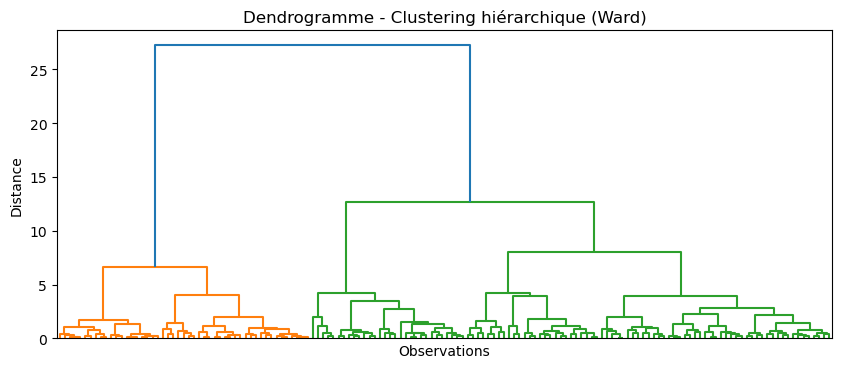

In [8]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z, no_labels=True, count_sort='ascending')
plt.title('Dendrogramme - Clustering hiérarchique (Ward)')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

### 🔷Résumé HIÉRARCHIQUE 

**1. Standardiser**

**2. Calculer distance**

**3. Linkage = fusion progressive**

**4. Dendrogramme = arbre**

**5. Couper l’arbre = clusters**

C’est une méthode **explicative** (on voit tout) mais **lente** et **rigide**.

## II. K-MEANS

### **Étape 1 — Choisir le nombre de clusters (k)**

**Pourquoi ?**

KMeans a besoin qu’on choisisse **k** avant.

- k=3 (pour tester)

- méthode du coude (inertia) pour vérifier

- silhouette pour confirmer

### Étape 2 — Initialisation des centroïdes

KMeans commence par **placer k points** (centroïdes) au hasard.

**Ce que ça signifie :**
ce sont les “prototypes” des clusters.

### Étape 3 — Assignation des points au centroïde le plus proche

Chaque individu est affecté au cluster dont il est le plus proche (distance euclidienne).

Simple :

Je regarde lequel des 3 centres est le plus proche → j’y vais.

### Étape 4 — Mise à jour des centroïdes

On recalcule chaque centroïde :
**moyenne de tous les points** de son cluster.

**Ça veut dire :**
le centre se déplace vers le “milieu” réel du groupe.

### Étape 5 — Boucle jusqu’à convergence

On répète :

- assigner points

- recalculer centres

jusqu’à ce que les centres ne bougent plus → **convergence**.

### Étape 6 — Résultats : clusters + centres

**Ce que ça donne :**

- l’étiquette du cluster pour chaque individu

- la position finale des centres

- la cohérence entre clusters

- la qualité (silhouette)

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels_k = kmeans.fit_predict(X_scaled)
df['kmeans_label'] = labels_k

C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


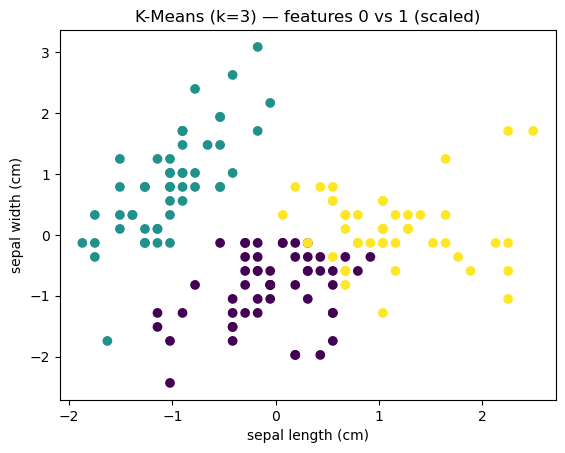

In [10]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_k)
plt.title(f'K-Means (k={k}) — features 0 vs 1 (scaled)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

### centers

In [12]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=feature_names)
print('Centres des clusters (approx. échelle originale) :')
centers_df

Centres des clusters (approx. échelle originale) :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.428000,1.462000,0.246000
2,6.780851,3.095745,5.510638,1.972340


### contingency KMeans vs species

In [13]:
print('Contingence : espèces réelles vs KMeans')
pd.crosstab(df['species'], df['kmeans_label'])

Contingence : espèces réelles vs KMeans


kmeans_label,0,1,2
species,,,
setosa,0,50,0
versicolor,39,0,11
virginica,14,0,36


### cut dendrogram and compare

In [18]:
n_clusters = 3
hier_labels = fcluster(Z, t=n_clusters, criterion='maxclust') - 1
df['hier_label'] = hier_labels

print('Contingence : espèces réelles vs hiérarchique (cut=3)')
pd.crosstab(df['species'], df['hier_label'])

print('Contingence : KMeans vs Hiérarchique (cut=3)')
pd.crosstab(df['kmeans_label'], df['hier_label'])

Contingence : espèces réelles vs hiérarchique (cut=3)
Contingence : KMeans vs Hiérarchique (cut=3)


hier_label,0,1,2
kmeans_label,,,
0,0,29,24
1,49,1,0
2,0,0,47


### Elbow

C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarn

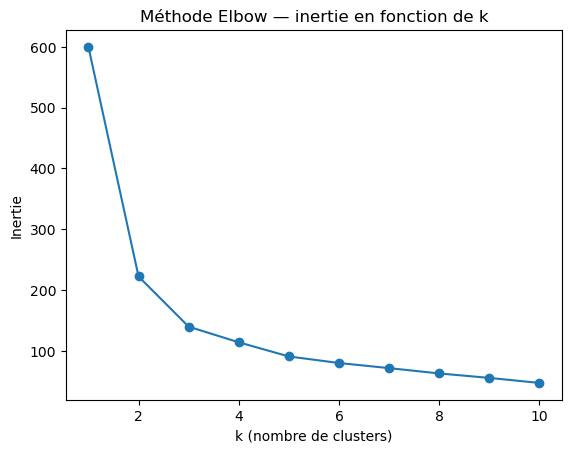

Inerties : {1: 600.0, 2: 222.36170496502308, 3: 139.8204963597498, 4: 114.09254690403088, 5: 90.80759161913358, 6: 80.02249599557439, 7: 71.61256504701674, 8: 62.8661017312956, 9: 55.51713748041519, 10: 47.263715688686844}


In [15]:
inertias = []
K_range = range(1, 11)
for kk in K_range:
    km = KMeans(n_clusters=kk, random_state=0, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.title('Méthode Elbow — inertie en fonction de k')
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Inertie')
plt.show()

print('Inerties :', {k:i for k,i in zip(K_range, inertias)})

### silhouette

C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bengueddache Asmaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarn

Silhouette scores (k=2..6) : {2: 0.5817500491982808, 3: 0.45994823920518635, 4: 0.38694104154427816, 5: 0.34551099599809465, 6: 0.3256773128015377}


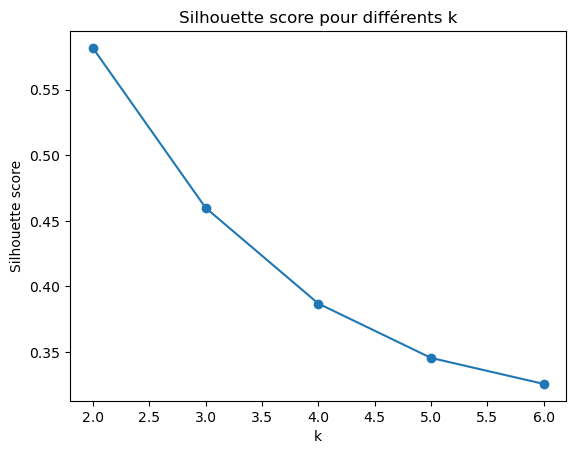

In [16]:
sil_scores = {}
for kk in range(2, 7):
    km = KMeans(n_clusters=kk, random_state=0, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[kk] = score
print('Silhouette scores (k=2..6) :', sil_scores)

plt.figure()
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette score pour différents k')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

### 3D plot

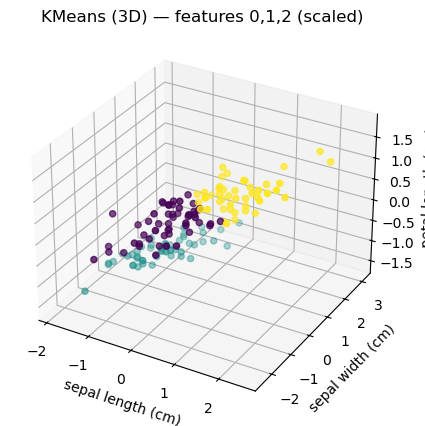

In [17]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
xs = X_scaled[:, 0]
ys = X_scaled[:, 1]
zs = X_scaled[:, 2]
ax.scatter(xs, ys, zs, c=df['kmeans_label'])
ax.set_title('KMeans (3D) — features 0,1,2 (scaled)')
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.show()

#### Résumé K-MEANS 

1. Choisir k

2. Initialiser centres

3. Assigner points

4. Recalculer centres

5. Boucler jusqu’à convergence

6. Résultat final = cluster + centre

C’est :

- rapide

- efficace

- mais nécessite k

- et dépend de l’initialisation.

## III. Différence essentielle entre HC et K-Means 

| Critère                      | HC                       | KMeans                           |
| ---------------------------- | ------------------------ | -------------------------------- |
| Décide k avant ?             | Non (on coupe l'arbre)   | Oui                              |
| Visualisation                | Excellent (dendrogramme) | Moyen                            |
| Vitesse                      | Lent                     | Rapide                           |
| Bonne pour petits datasets ? | Oui                      | Oui                              |
| Explicabilité                | Forte                    | Moyenne                          |
| Stabilité                    | Bonne                    | Peut varier selon initialisation |


## Exercices
- durée : 30 à 40 minutes (guidé)
1) K-Means (k=3)
    - Charger Iris (déjà fait)  
    - Standardiser (déjà fait)   
    - Lancer KMeans avec k=3   
    - Afficher scatter (features 0 vs 1) et centres   
    - Rédiger 1 phrase : que constatez-vous ?
2) Elbow (k = 1..10) 
    - Calculer inertie pour k=1..10 
    - Tracer la courbe Elbow
    - Indiquer quel k vous parait raisonnable (1 ligne)
3) Hiérarchique  
    - Calculer linkage (Ward)  
    - Tracer le dendrogramme   
    - Couper l'arbre en 3 clusters, récupérer labels
4) Comparaison   
    - Construire tables de contingence : species vs kmeans ; species vs hier ; kmeans vs hier   
    - Rédiger 2 lignes : quelles différences ?
5) Bonus (optionnel)
    - Calculer silhouette_score pour k=2..6 et commenter
    - Livrable (court) : 1 page contenant 2 plots (scatter KMeans + dendrogramme), 1 table de contingence et 1 paragraphe conclusion.